# Lab 02, January 28, 2020.
### Due  Tuesday, Feb 04, 2020
### COMPAS Risk Score Analysis - Part I

In this lab, you will get hands-on experience with auditing the recividism scoring algorithm (the COMPAS Risk Algorithm) for some notions of fairness, even though the algorithm itself is propietary. The first part of the lab will help you get started with finding the documentation to convert the concepts seen in the Propublica report to code and plots.



### Getting Started
To get started, like last time create a `lab02` folder in your local repo alongwith a `data` folder in it. In the data folder, place the data file, we will be using, which was obtained by ProPublica as a result of a public records request from Broward County, Florida. The csv file can be downloaded from [here](https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv). Place it in your *data* folder for *lab02*.

In [1]:
%matplotlib inline

import pandas as pd
import pylab
import numpy as np
import seaborn as sns

import pylab
import numpy as np
import matplotlib.pyplot as plt

Refer to last week's lab to write code that reads the *compas-scores-two-years.csv* downloaded in the step above, as a pandas data frame. Inspect the head or tail and the shape of the data frame.

In [2]:
# Answer here
data = pd.read_csv('data/compas-scores-two-years.csv', index_col=0)

In [3]:
data.shape

(7214, 52)

In [4]:
data.head()

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
id,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


Now we will filter out rows where **days_b_screening_arrest** is over 30 or under -30, leaving us with 6,172 rows. Write code to achieve this. Search the pandas documentation for this. To check, make sure your filtered data has 6,172 rows.

In [19]:
#Answer here
data[data['days_b_screening_arrest'] <= 30]


,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
id,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,0,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,0,...,3,Low,2013-08-30,2014-05-22,2014-06-03,3,0,265,0,0
10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,0,...,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
14,benjamin franc,benjamin,franc,2013-11-26,Male,1988-06-01,27,25 - 45,Caucasian,0,...,4,Low,2013-11-26,2013-11-25,2013-11-26,0,0,857,0,0
15,ellyaher lanza,ellyaher,lanza,2013-10-03,Male,1992-08-18,23,Less than 25,African-American,0,...,4,Low,2013-10-03,2013-10-03,2013-10-07,3,4,128,1,1


We will examine three variables here: `two_year_recid`, `decile_score`, and `race`.

To do this, first construct a data frame that contains only these three feature. Make it a habit to inspect the head or tail of all new data frames.

In [6]:
#Answer here


df.head()

,two_year_recid,decile_score,race
id,,,
1,0,1,Other
3,1,3,African-American
4,1,4,African-American
7,0,1,Other
8,1,6,Caucasian



Notice that each row falls in a decile_score bucket between 1 and 10.

### Part 1 
**Task 1** Write the body of a function that given a dataframe, returns two lists (each of length 10). Each element of the first list corresponds to the number of people in the dataframe who have a specific decile score and for whom `two_year_recid == 1`. The corresponding element of the second list counts the total number of people with that decile score.


In [7]:
#Answer


In [8]:
get_frequencies(filterData)

[[277, 264, 244, 291, 280, 308, 298, 302, 300, 245],
 [1286, 822, 647, 666, 582, 529, 496, 420, 420, 304]]

### Part 2
Now, we study the Positive Predictive Value, False Positive Rate, and False Negative Rate for a risk threshold of 4 (i.e., defendants with `decile_score >= 5` are classified as high risk), for black defendants and for white defendants.

 To achieve this, we will first use a threshold of 4, and designate anyone who scores 4 and below as low-risk. Designate anyone with a score of 5 and above as high risk. Now, for black defendants, compute the [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/), which consists of computing the following: 
- the number of **false negatives**, that is the number of black defendants who recidivated but got assigned a low score.
- **true positives**, that is, the number of black defendants who recidivated and got assigned a high score.
- **false positive**, that is, those who did not recidivate but got assigned a high score.
- **true negative**, that is, those who did not recidivate and got assigned a low score.

To compute these, follow the tasks below

**Task 2a**
Fill in the details of the code below, using the `get_frequencies` function. You will first need to filter the data to create two dataframes, one having only black defendants, the other having only white defendants.


In [ ]:
# they were high risk and black and they did recidvate
TP_black = 

# they were black and deemed low risk but did recividate
FN_black = 
# they were black and deemed low risk and they did not recidivate 
TN_black = 

# they were black and deemed high risk and they did not recidivate
FP_black = 


**Task 2b:** Repeat the process for white defendants.

In [ ]:
Your answer here

# they were white and high risk and they did recidvate
TP_white = 

#they were white and deemed low risk but did recividate
FN_white = 

# they were white and deemed low risk and they did not recidivate 
TN_white = 

# they were deemed high risk and they did not recidivate
FP_white = 


Consult [this resource](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Binary_Diagnostic_Tests-Single_Sample.pdf) to understand the false positive rate, the false negative rate and the positive predictive value of a binary test.

**Task 2b** Now, display the confusion matrix, and compute the false positive rates (FPR), false negative rates (FNR), and the positive predictive rates (PPR) for black and white defendants. Make sure you understand these well before attempting to write code for them.

See my output for an example.

Threshold:  4
 Black defendants
----------------------------------------
Recidivated?| Low score| High Score   
----------------------------------------
Yes         | 315        | 1346          
No          |694       | 820          
FPR: Black 0.5416116248348745
FNR: Black 0.1896447922937989
PPR: Black 0.6214219759926131

 White defendants
----------------------------------------
Recidivated?| Low score| High Score   
----------------------------------------
Yes         |310       | 512          
No          |854       | 427          
FPR 0.3333333333333333
FNR 0.3771289537712895
PPR: White 0.5452609158679447



**Task 2c** Compare the FNR and the FPR for the two sub-populations? What can you conclude? Does your analysis reproduce Propublica's analysis. Compare the PPR rates? What can you conslude from the PPR rates?

### Part 3
So far we used a threshold of 4 to decide whether a defendant is low risk or not. Now, we will examine different thresholds and compare the impact on FPRs and FNRs of black and white defendants.

**Task 3a** : To achieve this, write a function that generalizes the code you've written above, that takes in a threshold as an input, the distribution of black defendants who did (and did not) recidivate by score, and the distribution of white defendants who did (and did not) recidivate by score. The function should return the FPRs, FNRs and the PPRs for that threshold for both black and white defendants. 


In [ ]:
# Your answer here

**Task 3b**: Now, write code to create a two dimensional numpy array, `rates_thresh_black` such that the first column is the list of all thresholds (from 1 to 9), the second column the corresponding FPRs for black defendants corresponding to these thresholds, the third column the corresponding FNRs, and the fourth column the PPRs. 

In [ ]:

# Your answer here
# the first column is the threshold
# the second column the FPR
# the third colum the FNR
# the fourth colum the PPR



Repeat this process for white defendants.

**Task 3c** Assuming the arrays are `FP_rates_black`, `FN_rates_black`, `FP_rates_whites`, and `FN_rates_white`, the code below plots the FN Rates vs the FP Rates and marks the points corresponding to the thresholds. Notice, that this is essentially the ROC curve, except that we are using False Negative Rate which is 1 - True Positive Rate. Essentially, it uses your FPRs and FNRs to create your plot.

Text(0.5, 0, 'FPR')

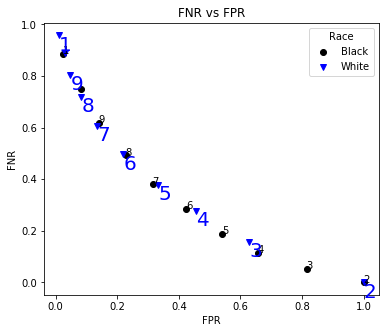

In [17]:
pylab.figure(6, figsize=(6, 5))
pylab.title('FNR vs FPR')

pylab.plot(FP_rates_black, FN_rates_black,  label="Black", marker ='o', linestyle = 'None', color = "black")
for i, txt in enumerate(range(1,10)):
    pylab.annotate(txt, (FP_rates_black[i], FN_rates_black[i]))
pylab.plot(FP_rates_white, FN_rates_white, label="White", marker = 'v', linestyle = 'None', color = "blue")
for i, txt in enumerate(range(1,10)):
    pylab.annotate(txt, (FP_rates_white[i], FN_rates_white[i]), horizontalalignment='left', verticalalignment='top',
            fontsize=20, color = "blue")

pylab.legend(title="Race")

pylab.ylabel('FNR')
pylab.xlabel('FPR')

**Task 3d:** Now, answer the following question:
> Can we pick two thresholds (one for black defendants, one for white defendants) such that FPR and FNR are roughly equal for the two groups (say, within 1% of each other)? What is the PPV for the two groups in this case? Note: trivial thresholds of 0 or 11 don’t count.